## 0. Import một số thư viện, framework cần thiết

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from copy import deepcopy

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures

from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

import pickle

In [2]:
PATH = 'D:/motorcycle price prediction/data/moto_cleaned_EDA.csv'
SAVE_PATH = 'D:/motorcycle price prediction/data/model/model.pkl'

In [3]:
df = pd.read_csv(PATH)

# Kiểm tra số chiều của bộ dữ liệu
print(f'Số chiều: {df.shape}')

df.head(10)

Số chiều: (17036, 9)


,Hang_xe,Tuoi_xe,Nam_dang_ky,Tinh_trang_xe,Dung_tich_xe,Dong_xe,So_km_da_di,Loai_xe,Gia_xe
0,Honda,7,2018,Đã sử dụng,Không biết rõ,AirBlade,38000,Tay ga,26000000.0
1,Honda,5,2020,Đã sử dụng,100 - 175 cc,MSX125,10000,Tay côn/Moto,20000000.0
2,Yamaha,1,2024,Đã sử dụng,100 - 175 cc,XSR,340,Tay côn/Moto,79000000.0
3,Hãng khác,0,2025,Mới,Không biết rõ,Dòng khác,0,Tay ga,14990000.0
4,Honda,5,2020,Đã sử dụng,100 - 175 cc,Vision,9000,Tay ga,28500000.0
5,Honda,8,2017,Đã sử dụng,Không biết rõ,Winner,5000,Xe số,6950000.0
6,Honda,2,2023,Đã sử dụng,100 - 175 cc,Lead,7000,Tay ga,49800000.0
7,Honda,21,2004,Đã sử dụng,Không biết rõ,Dylan,3000,Tay ga,35000000.0
8,Piaggio,11,2014,Đã sử dụng,100 - 175 cc,Liberty,20000,Tay ga,13000000.0
9,Honda,16,2009,Đã sử dụng,100 - 175 cc,SH,5,Xe số,90000000.0


## 1. Chuẩn hóa dữ liệu

In [4]:
# Loại bỏ các cột không cần thiết
df.drop(['Hang_xe', 'Nam_dang_ky'], axis=1, inplace=True)
df.head(10)

,Tuoi_xe,Tinh_trang_xe,Dung_tich_xe,Dong_xe,So_km_da_di,Loai_xe,Gia_xe
0,7,Đã sử dụng,Không biết rõ,AirBlade,38000,Tay ga,26000000.0
1,5,Đã sử dụng,100 - 175 cc,MSX125,10000,Tay côn/Moto,20000000.0
2,1,Đã sử dụng,100 - 175 cc,XSR,340,Tay côn/Moto,79000000.0
3,0,Mới,Không biết rõ,Dòng khác,0,Tay ga,14990000.0
4,5,Đã sử dụng,100 - 175 cc,Vision,9000,Tay ga,28500000.0
5,8,Đã sử dụng,Không biết rõ,Winner,5000,Xe số,6950000.0
6,2,Đã sử dụng,100 - 175 cc,Lead,7000,Tay ga,49800000.0
7,21,Đã sử dụng,Không biết rõ,Dylan,3000,Tay ga,35000000.0
8,11,Đã sử dụng,100 - 175 cc,Liberty,20000,Tay ga,13000000.0
9,16,Đã sử dụng,100 - 175 cc,SH,5,Xe số,90000000.0


In [5]:
# Chuẩn hóa các biến dữ liệu định tính
le_tinh_trg = LabelEncoder()
le_dung_tich = LabelEncoder()
le_dong_xe = LabelEncoder()
le_loai_xe = LabelEncoder()

df['Tinh_trang_xe'] = le_tinh_trg.fit_transform(df['Tinh_trang_xe'])
df['Dung_tich_xe'] = le_dung_tich.fit_transform(df['Dung_tich_xe'])
df['Dong_xe'] = le_dong_xe.fit_transform(df['Dong_xe'])
df['Loai_xe'] = le_loai_xe.fit_transform(df['Loai_xe'])

In [6]:
df.head(10)

,Tuoi_xe,Tinh_trang_xe,Dung_tich_xe,Dong_xe,So_km_da_di,Loai_xe,Gia_xe
0,7,1,3,7,38000,1,26000000.0
1,5,1,0,103,10000,0,20000000.0
2,1,1,0,188,340,0,79000000.0
3,0,0,3,51,0,1,14990000.0
4,5,1,0,176,9000,1,28500000.0
5,8,1,3,184,5000,2,6950000.0
6,2,1,0,95,7000,1,49800000.0
7,21,1,3,50,3000,1,35000000.0
8,11,1,0,99,20000,1,13000000.0
9,16,1,0,139,5,2,90000000.0


In [7]:
def check_label_encoder(encoder, column_name):
    print(f"Chuẩn hóa của cột {column_name}:")
    for idx, value in enumerate(encoder.classes_):
        print(f"{value} -> {idx}")
    print()

check_label_encoder(le_tinh_trg, 'Tinh_trang_xe')
check_label_encoder(le_dung_tich, 'Dung_tich_xe')
check_label_encoder(le_dong_xe, 'Dong_xe')
check_label_encoder(le_loai_xe, 'Loai_xe')

Chuẩn hóa của cột Tinh_trang_xe:
Mới -> 0
Đã sử dụng -> 1

Chuẩn hóa của cột Dung_tich_xe:
100 - 175 cc -> 0
50 - 100 cc -> 1
Dưới 50 cc -> 2
Không biết rõ -> 3
Trên 175 cc -> 4

Chuẩn hóa của cột Dong_xe:
1199panigale -> 0
302R -> 1
67 -> 2
@ -> 3
ADV150 -> 4
ADV160 -> 5
Acruzo -> 6
AirBlade -> 7
Amici -> 8
Amigo -> 9
Angela -> 10
Attila -> 11
Avitor -> 12
Axelo -> 13
BN302 -> 14
BX125 -> 15
BX150 -> 16
Beat -> 17
Bella -> 18
Beverly -> 19
Blade -> 20
Bonus -> 21
Boss -> 22
Bullet500 -> 23
C600 -> 24
CB -> 25
CBR -> 26
CD -> 27
CG125Fi -> 28
CaffeNero -> 29
CandyHi -> 30
CandyS -> 31
Cello -> 32
Chaly -> 33
Citi -> 34
Classic500 -> 35
Click -> 36
Crystal -> 37
Cub -> 38
Cuxi -> 39
DayStar125Fi -> 40
Daytona -> 41
Demon150GN -> 42
Demon150GR -> 43
Django -> 44
Dragster -> 45
Dream -> 46
Duke200 -> 47
Duke390 -> 48
Duke690 -> 49
Dylan -> 50
Dòng khác -> 51
EN -> 52
ET8 -> 53
EZ -> 54
Elegant -> 55
Elite -> 56
Elizabeth -> 57
Enjoy -> 58
Epicuro -> 59
Espero -> 60
Estrella -> 61
Evo200 -

Chuẩn hóa các cột đầu vào (Tuoi_xe, Tinh_trang_xe, Dung_tich_xe, Dong_xe, So_km_da_di, Loai_xe) về khoảng [-1, 1] bằng Mean Normalization để đảm bảo cho các thuật toán tối ưu

In [8]:
df1 = df.drop(['Gia_xe'], axis=1)
df1.columns

Index(['Tuoi_xe', 'Tinh_trang_xe', 'Dung_tich_xe', 'Dong_xe', 'So_km_da_di',
       'Loai_xe'],
      dtype='object')

In [9]:
# Hàm chuẩn hóa
def feature_scale(x):
    mean = deepcopy(x.mean())
    max = deepcopy(x.max())
    min = deepcopy(x.min())

    return (x - mean) / (max - min), mean, max, min

cols = []

for column in df1.columns:
    df[column], mean, max, min = feature_scale(df[column])
    cols.append((mean, max, min))

df.head(10)

,Tuoi_xe,Tinh_trang_xe,Dung_tich_xe,Dong_xe,So_km_da_di,Loai_xe,Gia_xe
0,-0.044375,0.010859,0.506398,-0.497752,0.330205,-0.010889,26000000.0
1,-0.088820,0.010859,-0.243602,-0.017752,-0.069801,-0.510889,20000000.0
2,-0.177709,0.010859,-0.243602,0.407248,-0.207803,-0.510889,79000000.0
3,-0.199931,-0.989141,0.506398,-0.277752,-0.212660,-0.010889,14990000.0
4,-0.088820,0.010859,-0.243602,0.347248,-0.084087,-0.010889,28500000.0
5,-0.022153,0.010859,0.506398,0.387248,-0.141231,0.489111,6950000.0
6,-0.155486,0.010859,-0.243602,-0.057752,-0.112659,-0.010889,49800000.0
7,0.266736,0.010859,0.506398,-0.282752,-0.169802,-0.010889,35000000.0
8,0.044514,0.010859,-0.243602,-0.037752,0.073058,-0.010889,13000000.0
9,0.155625,0.010859,-0.243602,0.162248,-0.212589,0.489111,90000000.0


In [10]:
# Thu nhỏ giá trị Gia_xe 
df['Gia_xe'] = df['Gia_xe'] / 1e6

df.head(10)

,Tuoi_xe,Tinh_trang_xe,Dung_tich_xe,Dong_xe,So_km_da_di,Loai_xe,Gia_xe
0,-0.044375,0.010859,0.506398,-0.497752,0.330205,-0.010889,26.00
1,-0.088820,0.010859,-0.243602,-0.017752,-0.069801,-0.510889,20.00
2,-0.177709,0.010859,-0.243602,0.407248,-0.207803,-0.510889,79.00
3,-0.199931,-0.989141,0.506398,-0.277752,-0.212660,-0.010889,14.99
4,-0.088820,0.010859,-0.243602,0.347248,-0.084087,-0.010889,28.50
5,-0.022153,0.010859,0.506398,0.387248,-0.141231,0.489111,6.95
6,-0.155486,0.010859,-0.243602,-0.057752,-0.112659,-0.010889,49.80
7,0.266736,0.010859,0.506398,-0.282752,-0.169802,-0.010889,35.00
8,0.044514,0.010859,-0.243602,-0.037752,0.073058,-0.010889,13.00
9,0.155625,0.010859,-0.243602,0.162248,-0.212589,0.489111,90.00


## 2. Tách thành các tập huấn luyện (training), kiểm thử (testing), validation 

In [11]:
X = df.drop(['Gia_xe'], axis=1)
y = df['Gia_xe']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=28)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=21)

In [12]:
# Kiểm tra qua số chiều của các tập train test
X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape

((13628, 6), (1704, 6), (1704, 6), (13628,), (1704,), (1704,))

## 3. Xây dựng mô hình

Trong phần xây dựng mô hình lần này, chúng ta sẽ sử dụng ba phương pháp:

<ul>
    <li>Hồi quy tuyến tính (Linear Regression)</li>
    <li>Rừng ngẫu nhiên (Random Forest)</li>
</ul>

### 3.1 Hồi quy tuyến tính (Linear Regression)

Với phương pháp hồi quy tuyến tính, chúng ta sẽ đưa ra các mô hình sau:

Mô hình đầu tiên của hồi quy tuyến tính: </br>
+ Chúng ta áp dụng phương pháp Hồi quy tuyến tính truyền thống, sử dụng thuật toán Stochastic Gradient Descent (SGD) để tìm các tham số tối ưu cho việc dự đoán Gia_xe

Mô hình thứ hai của hồi quy tuyến tính: </br>
+ Chúng ta áp dụng phương pháp Hồi quy đa thức, sử dụng thuật toán Stochastic Gradient Descent (SGD) để tìm các tham số tối ưu cho việc dự đoán giá xe, sau khi mở rộng đặc trưng bằng các tổ hợp đa thức 

Mô hình thứ ba của hồi quy tuyến tính: </br>
+ Chúng ta áp dụng phương pháp Hồi quy đa thức với hiệu chỉnh Ridge, sử dụng thuật toán Stochastic Gradient Descent (SGD) để tìm các tham số tối ưu, với một hàm mất mát bổ sung hiệu chỉnh L2 để giảm nguy cơ overfitting

In [13]:
ITERATIONS = 150

LR_model1 = SGDRegressor(max_iter=ITERATIONS, penalty=None, eta0=0.1)
LR_model1.fit(X_train, y_train)

poly_features = PolynomialFeatures(degree=3)
X_poly_train = poly_features.fit_transform(X_train)

LR_model2 = SGDRegressor(max_iter=ITERATIONS, penalty=None, eta0=0.1)
LR_model2.fit(X_poly_train, y_train)

LR_model3 = SGDRegressor(max_iter=ITERATIONS, eta0=0.1, penalty="l2", alpha=0.001)
LR_model3.fit(X_poly_train, y_train)

SGDRegressor(alpha=0.001, eta0=0.1, max_iter=150)

In [14]:
X_poly_train.shape

(13628, 84)

Để lựa chọn ra được mô hình tốt nhất, ta sẽ tính MSE trên tập huấn luyện, validation để so sánh hiệu suất, sau đó phân tích để chọn mô hình tốt nhất thông qua phương pháp Hồi quy tuyến tính

In [15]:
X_poly_val = poly_features.fit_transform(X_val)

y1_predict_train = LR_model1.predict(X_train)
y2_predict_train = LR_model2.predict(X_poly_train)
y3_predict_train = LR_model3.predict(X_poly_train)

y1_predict_val = LR_model1.predict(X_val)
y2_predict_val = LR_model2.predict(X_poly_val)
y3_predict_val = LR_model3.predict(X_poly_val)

MSE_train_1 = mean_squared_error(y1_predict_train, y_train)
MSE_train_2 = mean_squared_error(y2_predict_train, y_train)
MSE_train_3 = mean_squared_error(y3_predict_train, y_train)

MSE_val_1 = mean_squared_error(y1_predict_val, y_val)
MSE_val_2 = mean_squared_error(y2_predict_val, y_val)
MSE_val_3 = mean_squared_error(y3_predict_val, y_val)

In [16]:
MSE_train_1, MSE_train_2, MSE_train_3

(558.0345766931466, 432.8974287253117, 464.3328150049612)

In [17]:
MSE_val_1, MSE_val_2, MSE_val_3

(701.9878956414206, 525.1634337729831, 568.1896593898359)

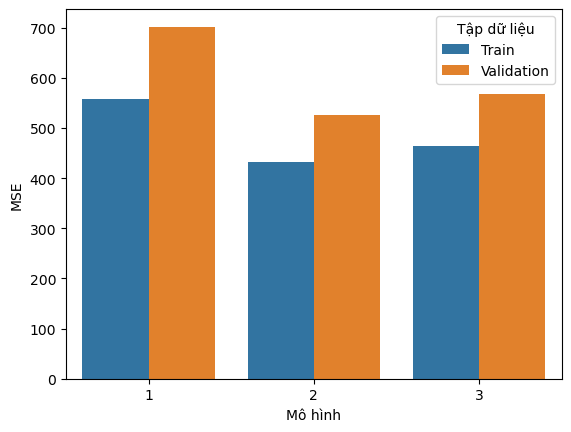

In [18]:
# Biểu đồ thể hiện tương quan giữa các đại lượng MSE của 3 mô hình trong phương pháp Hồi quy tuyến tính
MSE_all = pd.DataFrame({
    'Mô hình' : [1, 1, 2, 2, 3, 3],
    'MSE' : [MSE_train_1, MSE_val_1, MSE_train_2, MSE_val_2, MSE_train_3, MSE_val_3],
    'Tập dữ liệu' : ['Train', 'Validation', 'Train', 'Validation', 'Train', 'Validation']
})

sns.barplot(data=MSE_all, x="Mô hình", y="MSE", hue="Tập dữ liệu")
plt.show()

Mô hình thứ hai thể hiện tốt nhất khi so sánh tương quan giữa hai mô hình còn lại, nên ta sẽ lựa chọn mô hình này

In [19]:
# Decision
X_poly_test = poly_features.fit_transform(X_test)
y2_predict_test = LR_model2.predict(X_poly_test)
MSE_test_LR = mean_squared_error(y2_predict_test, y_test)

prop_LR = np.sum(np.abs(y2_predict_test - np.array(y_test)) < 7) / len(y_test)

best_LR_model = {
    "Model" : LR_model2,
    "MSE_test" : MSE_test_LR,
    "Less_than_7mi_prop" : prop_LR
}

### 3.2 Rừng ngẫu nhiên (Random Forest)

Với phương pháp Rừng ngẫu nhiên (Random Forest), chúng ta sẽ sử dụng hai phương pháp:

Phương pháp rừng ngẫu nhiên truyền thống: </br>
+ Chúng ta áp dụng phương pháp Random Forest, sử dụng nhiều cây quyết định để dự đoán Gia_xe, với tham số min_samples_split=7 để kiểm soát độ phức tạp

XGboost - một biến thể của rừng ngẫu nhiên: </br>
+ Chúng ta áp dụng XGBoost, một phương pháp Gradient Boosting, sử dụng các cây quyết định tuần tự để dự đoán Gia_xe, với tham số max_depth=5 để kiểm soát độ phức tạp

In [20]:
ET_model1 = RandomForestRegressor(min_samples_split=7)

In [21]:
ET_model1.fit(X_train, y_train)

RandomForestRegressor(min_samples_split=7)

In [22]:
ET_model2 = XGBRegressor(max_depth=5)

In [23]:
ET_model2.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

Để lựa chọn ra được mô hình tốt nhất, ta sẽ tính MSE trên tập huấn luyện, validation để so sánh hiệu suất, sau đó phân tích để chọn mô hình tốt nhất thông qua phương pháp Rừng ngẫu nhiên

In [24]:
y1_pred_train = ET_model1.predict(X_train)
y2_pred_train = ET_model2.predict(X_train)

y1_pred_val = ET_model1.predict(X_val)
y2_pred_val = ET_model2.predict(X_val)

MSE_train1 = mean_squared_error(y1_pred_train, y_train)
MSE_train2 = mean_squared_error(y2_pred_train, y_train)

MSE_val1 = mean_squared_error(y1_pred_val, y_val)
MSE_val2 = mean_squared_error(y2_pred_val, y_val)

In [25]:
MSE_train1, MSE_train2

(86.09187129502466, 117.57058220274207)

In [26]:
MSE_val1, MSE_val2

(221.52522160862424, 210.98297245127134)

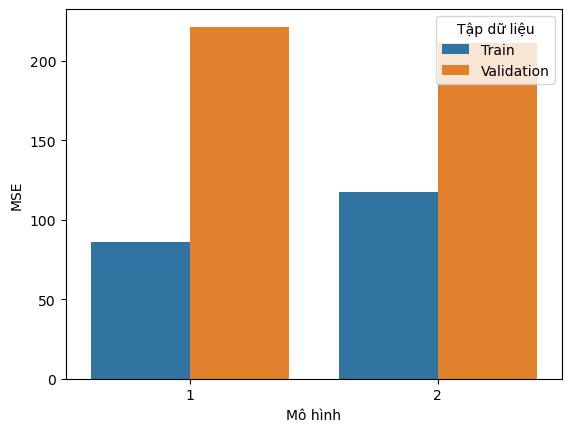

In [27]:
# Biểu đồ thể hiện tương quan giữa các đại lượng MSE của 2 mô hình trong phương pháp Rừng ngẫu nhiên
MSE_all = pd.DataFrame({
    'Mô hình' : [1, 1, 2, 2],
    'MSE' : [MSE_train1, MSE_val1, MSE_train2, MSE_val2],
    'Tập dữ liệu' : ['Train', 'Validation', 'Train', 'Validation']
})

sns.barplot(data=MSE_all, x="Mô hình", y="MSE", hue="Tập dữ liệu")
plt.show()

Mô hình thứ hai thể hiện tốt nhất khi so sánh tương quan giữa hai mô hình còn lại, nên ta sẽ lựa chọn mô hình này

In [28]:
# Decision
y2_pred_test = ET_model2.predict(X_test)
MSE_test_ET = mean_squared_error(y2_pred_test, y_test)

prop_ET = np.sum(np.abs(y2_pred_test - np.array(y_test)) < 7) / len(y_test)

best_ET_model = {
    "Model" : ET_model2,
    "MSE_test" : MSE_test_ET,
    "Less_than_7mi_prop" : prop_ET
}

In [29]:
best_LR_model

{'Model': SGDRegressor(eta0=0.1, max_iter=150, penalty=None),
 'MSE_test': 514.8948122227838,
 'Less_than_7mi_prop': 0.4465962441314554}

In [30]:
best_ET_model

{'Model': XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...),
 'MSE_test': 286.29267390381654,
 'Less_than_7mi_prop': 0.6965962441314554}

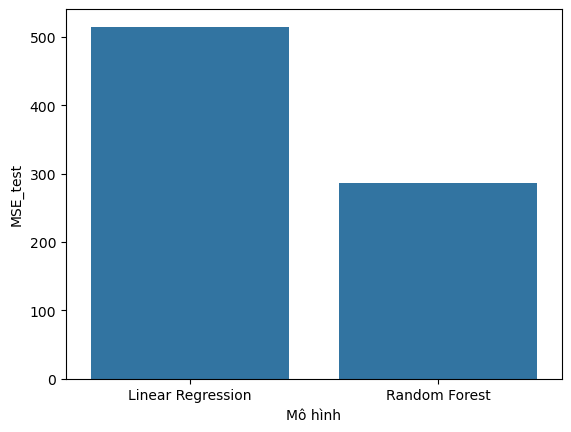

In [31]:
MSE_all = pd.DataFrame({
    'Mô hình' : ["Linear Regression", "Random Forest"],
    'MSE_test' : [best_LR_model['MSE_test'], best_ET_model['MSE_test']],
})

sns.barplot(data=MSE_all, x="Mô hình", y="MSE_test")
plt.show()

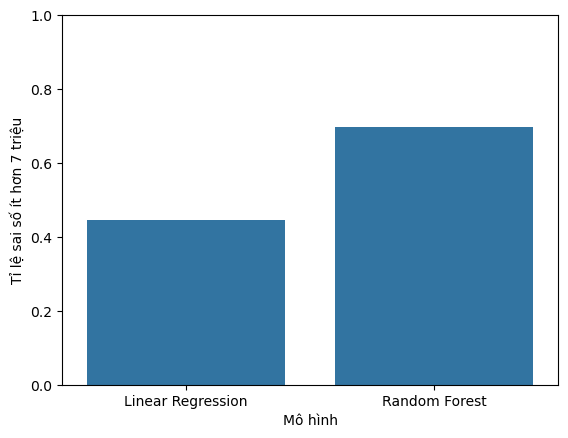

In [32]:
MSE_all = pd.DataFrame({
    'Mô hình' : ["Linear Regression", "Random Forest"],
    'Tỉ lệ sai số ít hơn 7 triệu' : [best_LR_model['Less_than_7mi_prop'], best_ET_model['Less_than_7mi_prop']],
})

sns.barplot(data=MSE_all, x="Mô hình", y="Tỉ lệ sai số ít hơn 7 triệu")
plt.ylim((0, 1))
plt.show()

In [33]:
comparison_table = pd.DataFrame({
    'Mô hình': ["Hồi quy tuyến tính", "Rừng ngẫu nhiên"],
    'MSE_test': [best_LR_model['MSE_test'], best_ET_model['MSE_test']],
    'Tỷ lệ sai số < 7 triệu (%)': [best_LR_model['Less_than_7mi_prop'] * 100, best_ET_model['Less_than_7mi_prop'] * 100]
})

print(comparison_table)

              Mô hình    MSE_test  Tỷ lệ sai số < 7 triệu (%)
0  Hồi quy tuyến tính  514.894812                   44.659624
1     Rừng ngẫu nhiên  286.292674                   69.659624


In [34]:
# Final decision
last_model = best_ET_model['Model']

predict_system = {
    "model" : last_model,
    "le_tinh_trg" : le_tinh_trg,
    "le_dung_tich" : le_dung_tich,
    "le_dong_xe" : le_dong_xe,
    "le_loai_xe" : le_loai_xe,
    "cols" : cols
}

In [35]:
pickle.dump(predict_system, open(SAVE_PATH, 'wb'))